In [1]:
#Set working directory
import os
os.chdir("C:/Users/Ashmeet Kaur/Downloads/train_cab")

In [2]:
#Check current working directory
os.getcwd()

'C:\\Users\\Ashmeet Kaur\\Downloads\\train_cab'

In [3]:
#Import dataset
import pandas as pd
train_cab=pd.read_csv("train_cab.csv",encoding="latin-1")
train_cab

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [4]:
train_cab.shape

(16067, 7)

In [5]:
#check the datatype
train_cab.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [6]:
#Perform data conversion
train_cab["fare_amount"]=pd.to_numeric(train_cab["fare_amount"],errors="coerce")
train_cab["pickup_datetime"]=pd.to_datetime(train_cab["pickup_datetime"],errors="coerce")

In [7]:
train_cab.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
dtype: object

In [8]:
#load test data
test=pd.read_csv("test.csv",encoding="latin-1")
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [9]:
#Check datatypes
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
#Perform datatype conversion
test["pickup_datetime"]=pd.to_datetime(test["pickup_datetime"],errors="coerce")
test.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [11]:
#Check the datavalues of fare amount variable
train_cab["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 16067, dtype: float64

In [12]:
#Check the datavalues of passenger count variable
train_cab["passenger_count"].sort_values(ascending=False)

1146     5345.0
293      5334.0
8985      557.0
971       554.0
8506      537.0
          ...  
8076        NaN
8139        NaN
8259        NaN
8306        NaN
16066       NaN
Name: passenger_count, Length: 16067, dtype: float64

In [13]:
train_cab["passenger_count"].value_counts()

1.00       11259
2.00        2322
5.00        1045
3.00         676
4.00         329
6.00         302
0.00          57
43.00          2
53.00          2
0.12           1
1.30           1
531.20         1
345.00         1
456.00         1
87.00          1
55.00          1
58.00          1
236.00         1
535.00         1
536.00         1
537.00         1
554.00         1
5334.00        1
35.00          1
5345.00        1
557.00         1
354.00         1
Name: passenger_count, dtype: int64

In [14]:
#Passenger count can't be greater than 6 and less than 1
#We will assume fare amount greater than 500 as an outlier and it can't also be zero or negative
#So we will drop all these observations
train_cab=train_cab.drop(train_cab[train_cab["fare_amount"]<1].index,axis=0)
train_cab=train_cab.drop(train_cab[train_cab["fare_amount"]>500].index,axis=0)
train_cab=train_cab.drop(train_cab[train_cab["passenger_count"]<1].index,axis=0)
train_cab=train_cab.drop(train_cab[train_cab["passenger_count"]>6].index,axis=0)

In [15]:
train_cab.shape

(15982, 7)

In [16]:
train_cab.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15958.000000,15982.000000,15982.000000,15982.000000,15982.000000,15927.000000
mean,11.373649,-72.473266,39.920506,-72.463554,39.898493,1.649733
std,10.807029,10.543787,6.815267,10.571554,6.187139,1.265974
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992156,40.734946,-73.991181,40.734724,1.000000
50%,8.500000,-73.981697,40.752640,-73.980166,40.753585,1.000000
75%,12.500000,-73.966833,40.767407,-73.963642,40.768031,2.000000
max,453.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [17]:
#Longitude value should range from -180 and 180 and can't be zero
#Latitude values should range from -90 to 90 and can't be zero
print('pickup_longitude above 180={}'.format(sum(train_cab['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(train_cab['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(train_cab['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(train_cab['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(train_cab['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(train_cab['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(train_cab['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(train_cab['dropoff_latitude']>90)))
print('pickup_longitude equal to 0={}'.format(sum(train_cab['pickup_longitude']==0)))
print('pickup_latitude equal to 0={}'.format(sum(train_cab['pickup_latitude']==0)))
print('dropoff_longitude equal to 0={}'.format(sum(train_cab['dropoff_longitude']==0)))
print('dropoff_latitude equal to 0={}'.format(sum(train_cab['dropoff_latitude']==0)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0
pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [18]:
#Drop all the rows having latitude and longitude values equal to zero
for i in ["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"]:
    train_cab=train_cab.drop(train_cab[train_cab[i]==0].index,axis=0)

In [19]:
train_cab.shape

(15660, 7)

In [20]:
#Missing value analysis
train_cab.isnull().sum()

fare_amount          22
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [21]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [22]:
#Dataframe with the percentagae of missing values in train dataset
#Create the dataframe with missing values percentage
missing_val1=pd.DataFrame(train_cab.isnull().sum())
missing_val1=missing_val1.reset_index()
missing_val1=missing_val1.rename(columns={"index":"variables",0:"Missing_%age"})
#Calculate the percentage
missing_val1["Missing_%age"]=(missing_val1["Missing_%age"]/len(train_cab))*100
missing_val1

,variables,Missing_%age
0,fare_amount,0.140485
1,pickup_datetime,0.006386
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.351213


In [23]:
#Dataframe with the percentagae of missing values in test dataset
#Create the dataframe with missing values percentage
missing_val1=pd.DataFrame(test.isnull().sum())
missing_val1=missing_val1.reset_index()
missing_val1=missing_val1.rename(columns={"index":"variables",0:"Missing_%age"})
#Calculate the percentage
missing_val1["Missing_%age"]=(missing_val1["Missing_%age"]/len(test))*100
missing_val1

,variables,Missing_%age
0,pickup_datetime,0.0
1,pickup_longitude,0.0
2,pickup_latitude,0.0
3,dropoff_longitude,0.0
4,dropoff_latitude,0.0
5,passenger_count,0.0


In [24]:
#Remove pickup datatime null value observation
train_cab=train_cab.drop(train_cab[train_cab['pickup_datetime'].isnull()].index, axis=0)
train_cab=train_cab.drop(train_cab[train_cab['passenger_count'].isnull()].index, axis=0)
train_cab.isnull().sum()

fare_amount          22
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count       0
dtype: int64

In [25]:
#imputation methods for fare_amount
train_cab["fare_amount"].loc[1]
#Actual value=16.9
#Mean value=11.36
#median value=11.36
#We analyze that the value imputed by both the method is close to the actual value and 
#we can opt that method

16.9

In [26]:
import numpy as np
train_cab["fare_amount"].loc[1]=np.nan
train_cab["fare_amount"].loc[1]

c:\users\ashmeet kaur\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


nan

In [27]:
#Mean method for fare_amount
train_cab["fare_amount"]=train_cab["fare_amount"].fillna(train_cab["fare_amount"].mean())
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500000,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,11.368453,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.700000,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.700000,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.300000,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [28]:
#Median method for fare_amount
train_cab["fare_amount"].fillna(train_cab["fare_amount"].median()).loc[1]
train_cab["fare_amount"].loc[1]

11.36845324433605

In [29]:
train_cab.head(20)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500000,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,11.368453,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.700000,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.700000,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.300000,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.100000,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.500000,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.500000,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1.0
8,11.368453,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.900000,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0


In [30]:
train_cab.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [31]:
train_cab.head(12)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.500000,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,11.368453,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.700000,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.700000,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.300000,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.100000,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.500000,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.500000,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1.0
8,11.368453,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.900000,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2.0


In [32]:
train_cab["passenger_count"].unique()

array([1. , 2. , 3. , 6. , 5. , 4. , 1.3])

In [33]:
#Since the passenger count value can't be 1.3 so we will drop these observataions
train_cab=train_cab.drop(train_cab[train_cab["passenger_count"]==1.3].index,axis=0)

In [34]:
train_cab["passenger_count"].unique()

array([1., 2., 3., 6., 5., 4.])

In [35]:
#Extract info from the pcikup_datetime variable
data=train_cab.copy

In [36]:
train_cab['pickup_datetime']=pd.to_datetime(train_cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [37]:
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [38]:
train_cab['year'] =train_cab['pickup_datetime'].dt.year
train_cab['Month']=train_cab['pickup_datetime'].dt.month
train_cab['Date']=train_cab['pickup_datetime'].dt.day
train_cab['Day']=train_cab['pickup_datetime'].dt.dayofweek
train_cab['Hour']=train_cab['pickup_datetime'].dt.hour
train_cab['Minute']=train_cab['pickup_datetime'].dt.minute

In [39]:
train_cab['year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015], dtype=int64)

In [40]:
train_cab['Month'].unique()

array([ 6,  1,  8,  4,  3, 11, 12,  9,  7,  2,  5, 10], dtype=int64)

In [41]:
train_cab['Date'].unique()

array([15,  5, 18, 21,  9,  6, 20,  4,  3,  2,  8, 19, 22,  7, 12, 10, 28,
       11, 24, 29, 31,  1, 14, 23, 16, 17, 27, 25, 30, 26, 13],
      dtype=int64)

In [42]:
train_cab['Day'].unique()

array([0, 1, 3, 5, 2, 6, 4], dtype=int64)

In [43]:
train_cab['Hour'].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 19, 14, 12, 18, 15,  6, 23,  3,
        8, 10, 11, 21,  2, 22,  5], dtype=int64)

In [44]:
train_cab['Minute'].unique()

array([26, 52, 35, 30, 51, 50, 22, 10, 11,  4, 54,  8, 36, 18, 15, 17, 29,
       37, 47,  3,  5, 42, 39, 55, 38, 28, 12, 14, 53, 16,  9, 31,  1,  7,
        6, 13, 57, 21, 59, 19, 34, 20,  0, 33, 24, 44, 40,  2, 49, 48, 41,
       56, 23, 43, 27, 45, 46, 32, 58, 25], dtype=int64)

In [45]:
test['year'] =test['pickup_datetime'].dt.year
test['Month']=test['pickup_datetime'].dt.month
test['Date']=test['pickup_datetime'].dt.day
test['Day']=test['pickup_datetime'].dt.dayofweek
test['Hour']=test['pickup_datetime'].dt.hour
test['Minute']=test['pickup_datetime'].dt.minute

In [46]:
test['year'].unique()

array([2015, 2011, 2012, 2014, 2010, 2013, 2009], dtype=int64)

In [47]:
test['Month'].unique()

array([ 1, 10, 12,  2,  3,  7,  6,  8, 11,  9,  4,  5], dtype=int64)

In [48]:
test['Date'].unique()

array([27,  8,  1,  6, 18, 29, 15, 14, 12, 20, 22,  4, 24, 28, 21,  9, 25,
        7, 31, 10, 23, 30,  2,  5,  3, 16, 11, 26, 19, 17, 13],
      dtype=int64)

In [49]:
test['Day'].unique()

array([1, 5, 3, 0, 6, 2, 4], dtype=int64)

In [50]:
test['Hour'].unique()

array([13, 11, 21, 12, 15, 20,  3, 16,  2,  9,  0,  8, 19, 18, 14, 23, 10,
       22,  4,  7,  6,  5, 17,  1], dtype=int64)

In [51]:
test['Minute'].unique()

array([ 8, 53, 12, 10, 22, 20, 59, 45,  9, 39, 42, 34, 14, 58, 38, 36, 52,
       29,  3, 37, 16, 54, 31, 57, 55, 47,  2, 33, 32, 50, 13, 19, 11,  6,
        1, 27, 23, 48, 17,  7, 21, 15, 44,  4, 46, 35, 43, 18, 25, 26, 49,
       30,  0, 51, 40,  5, 56, 41, 28, 24], dtype=int64)

In [52]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,4.500000,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,11.368453,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,5.700000,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,7.700000,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,5.300000,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51


In [53]:
train_cab.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [54]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12


In [55]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [56]:
#Now we will calculate the distance using latitude and longitude values
from math import radians, cos, sin, asin, sqrt
def distance(dis):
    lon1=dis[0]
    lat1=dis[1]
    lon2=dis[2]
    lat2=dis[3]
    #convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    #distance formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [57]:
train_cab['distance'] = train_cab[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(distance,axis=1)

In [58]:
test["distance"]=test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(distance,axis=1)

In [59]:
train_cab.shape

(15603, 14)

In [60]:
test.shape

(9914, 13)

In [61]:
train_cab["distance"].sort_values(ascending=False)

5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
            ...     
1630        0.000000
503         0.000000
4793        0.000000
4769        0.000000
843         0.000000
Name: distance, Length: 15603, dtype: float64

In [62]:
train_cab["fare_amount"].sort_values(ascending=False)

607      453.00
980      434.00
1335     180.00
1483     165.00
14142    108.00
          ...  
1419       2.50
15490      2.50
14633      2.50
226        2.50
1427       1.14
Name: fare_amount, Length: 15603, dtype: float64

In [63]:
test["distance"].sort_values(ascending=False)

4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
          ...    
8835     0.000000
943      0.000000
2258     0.000000
7637     0.000000
6335     0.000000
Name: distance, Length: 9914, dtype: float64

In [64]:
#We will drop where distance= 0 and greater than 150
train_cab=train_cab.drop(train_cab[train_cab["distance"]==0].index,axis=0)
train_cab=train_cab.drop(train_cab[train_cab["distance"]>140].index,axis=0)
train_cab=train_cab.drop(train_cab[train_cab["fare_amount"]>200].index,axis=0)
test=test.drop(test[test["distance"]==0].index,axis=0)
test=test.drop(test[test["distance"]>50].index,axis=0)

In [65]:
train_cab.shape

(15444, 14)

In [66]:
test.shape

(9826, 13)

In [67]:
#create the train dataframe with useful varaiabales
variable=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'Minute']
train_cab=train_cab.drop(variable,axis = 1)

In [68]:
train_cab.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.500000,1.0,2009,6,15,0,17,1.030764
1,11.368453,1.0,2010,1,5,1,16,8.450134
2,5.700000,2.0,2011,8,18,3,0,1.389525
3,7.700000,1.0,2012,4,21,5,4,2.799270
4,5.300000,1.0,2010,3,9,1,7,1.999157


In [69]:
#Create test datframe with useful variables
variable=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'Minute']
test=test.drop(variable,axis = 1)

In [70]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [71]:
train_cab['passenger_count']=train_cab['passenger_count'].astype('int64')

In [72]:
train_cab.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.500000,1,2009,6,15,0,17,1.030764
1,11.368453,1,2010,1,5,1,16,8.450134
2,5.700000,2,2011,8,18,3,0,1.389525
3,7.700000,1,2012,4,21,5,4,2.799270
4,5.300000,1,2010,3,9,1,7,1.999157


{'whiskers': [<matplotlib.lines.Line2D at 0xc943b7f808>,
 'caps': [<matplotlib.lines.Line2D at 0xc943b7ff88>,
 'boxes': [<matplotlib.lines.Line2D at 0xc943b6b488>],
 'medians': [<matplotlib.lines.Line2D at 0xc943b8bf08>],
 'fliers': [<matplotlib.lines.Line2D at 0xc943b91f08>],
 'means': []}

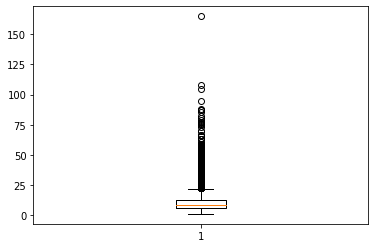

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(train_cab["fare_amount"])

{'whiskers': [<matplotlib.lines.Line2D at 0xc943c2e648>,
 'caps': [<matplotlib.lines.Line2D at 0xc943c2ef08>,
 'boxes': [<matplotlib.lines.Line2D at 0xc943c1e348>],
 'medians': [<matplotlib.lines.Line2D at 0xc943c32e88>],
 'fliers': [<matplotlib.lines.Line2D at 0xc943c38d08>],
 'means': []}

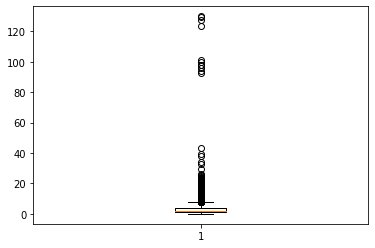

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(train_cab["distance"])

In [75]:
cnames=["fare_amount","distance"]
for i in cnames:
    q75,q25=np.percentile(train_cab["distance"],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    train_cab=train_cab.drop(train_cab[train_cab.loc[:,i]<min].index)
    train_cab=train_cab.drop(train_cab[train_cab.loc[:,i]>max].index)

In [76]:
train_cab.shape

(6758, 8)

# Data Visualization
Check the relation of each independent variable with the target variable

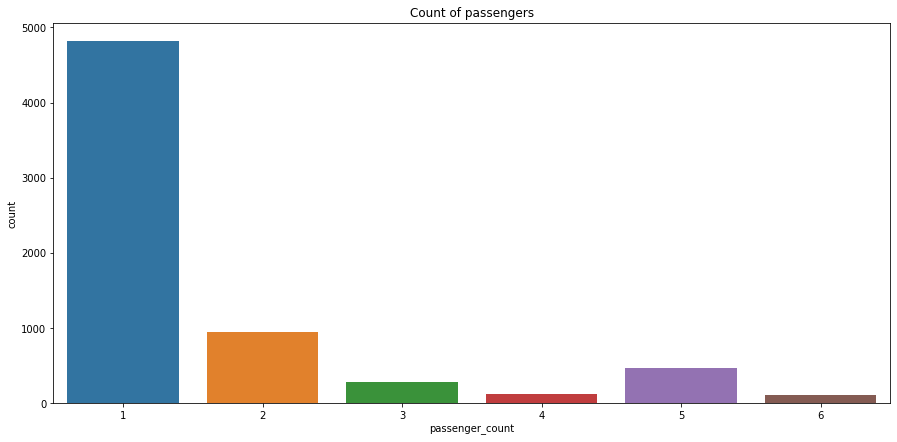

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count",data=train_cab)
plt.title("Count of passengers")
plt.show()

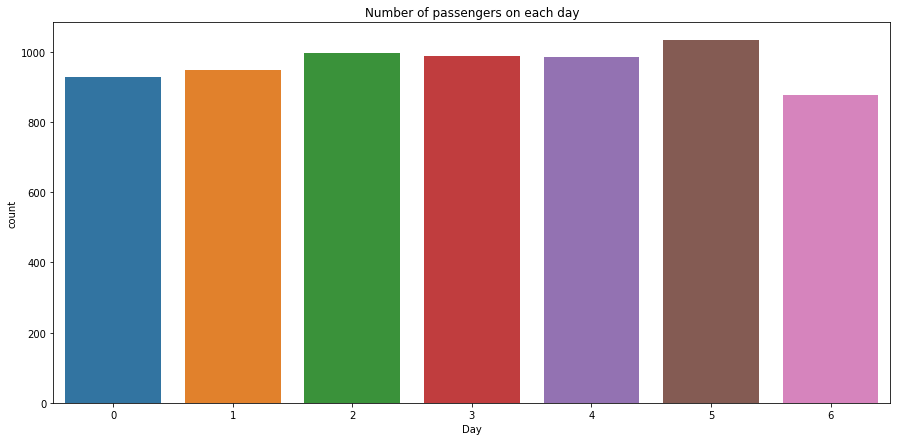

In [78]:
plt.figure(figsize=(15,7))
sns.countplot(x='Day',data=train_cab)
plt.title("Number of passengers on each day")
plt.show()

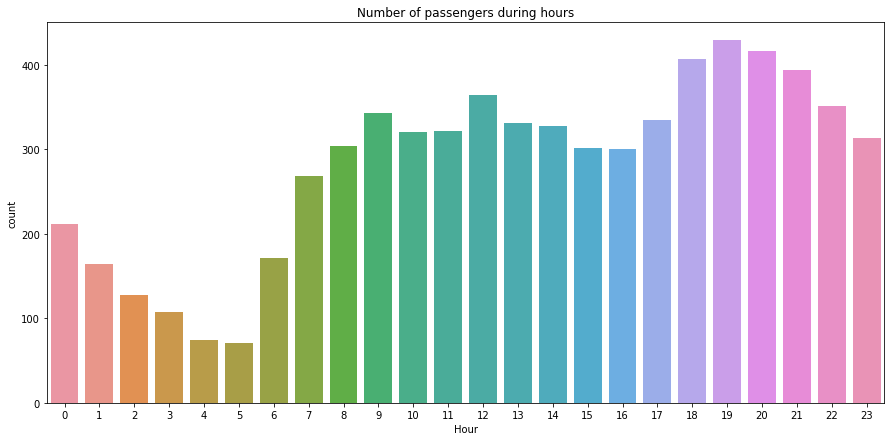

In [79]:
plt.figure(figsize=(15,7))
sns.countplot(x='Hour',data=train_cab)
plt.title("Number of passengers during hours")
plt.show()

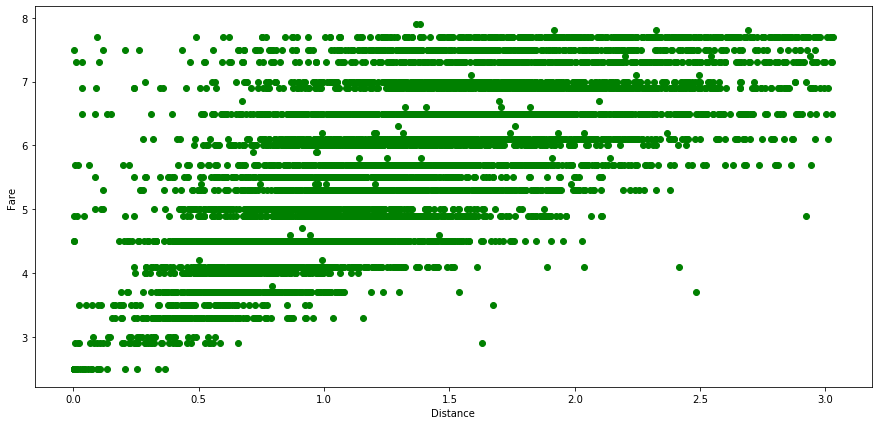

In [80]:
#Relationship between distance and fare 
plt.figure(figsize=(15,7))
plt.scatter(x = train_cab['distance'],y = train_cab['fare_amount'],c = "g")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

             fare_amount  distance
fare_amount     1.000000  0.669248
distance        0.669248  1.000000


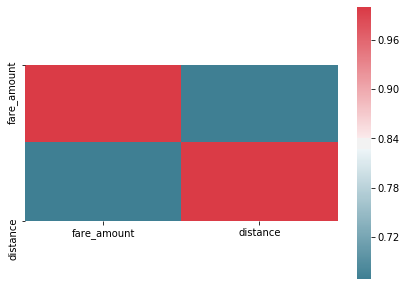

In [81]:
import matplotlib.pyplot as plt
cnames=["fare_amount","distance"]
f,ax=plt.subplots(figsize=(7, 5))
train=train_cab.loc[:,cnames]
#Generate correlation matrix
corr=train.corr()
print(corr)

#Plotted using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),
            square=True, ax=ax)

# Feature Scaling

fare_amount


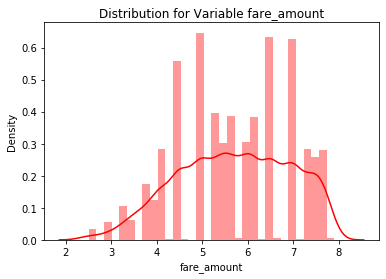

distance


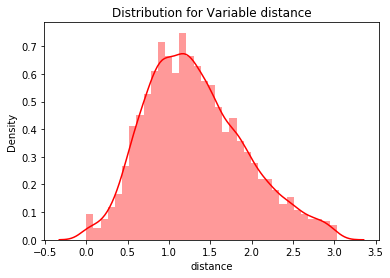

In [82]:
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train_cab[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Since the skewness is high we will perform normalization 

In [83]:
train_cab.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1,2009,6,15,0,17,1.030764
2,5.7,2,2011,8,18,3,0,1.389525
3,7.7,1,2012,4,21,5,4,2.799270
4,5.3,1,2010,3,9,1,7,1.999157
6,7.5,1,2012,11,20,1,20,1.555807


In [84]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


# Linear Regression 

For linear regression model check the linear relationship between the independent and target variable

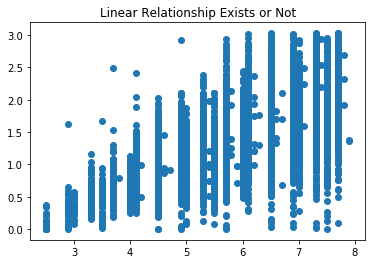

In [85]:
plt.scatter(train_cab['fare_amount'],train_cab['distance'])
plt.title("Linear Relationship Exists or Not")
plt.show()

In [86]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] =[variance_inflation_factor(train_cab.values, i) for i in range(train_cab.shape[1])]
vif["features"] =train_cab.columns
vif

,VIF Factor,features
0,41.232233,fare_amount
1,2.696932,passenger_count
2,38.518772,year
3,4.154868,Month
4,4.318474,Date
5,3.371515,Day
6,5.702174,Hour
7,10.628359,distance


In [87]:
data=train_cab.copy()
df=data.drop(["year"],axis=1)
df.head()

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
0,4.5,1,6,15,0,17,1.030764
2,5.7,2,8,18,3,0,1.389525
3,7.7,1,4,21,5,4,2.799270
4,5.3,1,3,9,1,7,1.999157
6,7.5,1,11,20,1,20,1.555807


In [88]:
from sklearn.model_selection import train_test_split
train,test1=train_test_split(df,test_size=0.2)

In [89]:
import statsmodels.api as sm
model=sm.OLS(train.iloc[:,0],train.iloc[:,1:6]).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            fare_amount   R-squared (uncentered):                   0.902
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              9926.
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                        0.00
Time:                        12:59:34   Log-Likelihood:                         -10918.
No. Observations:                5406   AIC:                                  2.185e+04
Df Residuals:                    5401   BIC:                                  2.188e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
passenger_count     0.2974      0.019     15.754      0.000       0.260       0.334
Month               0.1835      0.006     28.869      0.000       0.171       0.196
Date                0.0691      0.003     26.987      0.000       0.064       0.074
Day                 0.2896      0.012     25.174      0.000       0.267       0.312
Hour                0.1302      0.003     39.821      0.000       0.124       0.137
==============================================================================
Omnibus:                       16.066   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.960
Skew:                          -0.031   Prob(JB):                      0.00153
Kurtosis:                       2.768   Cond. No.                         17.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

In [92]:
predictions_LR=model.predict(test1.iloc[:,1:6])

In [93]:
MAPE(test1.iloc[:,0],predictions_LR)
#Accuracy:71.85

27.662598145149158

In [94]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(test1.iloc[:,0],predictions_LR)
MAE=mean_absolute_error(test1.iloc[:,0],predictions_LR)
RMSE=sqrt(MSE)
print("MSE for Linear Regression:",MSE)
print("MAE for Linear Regression:",MAE)
print("RMSE for Linear Regression:",RMSE)

MSE for Linear Regression: 3.4921058181057103
MAE for Linear Regression: 1.514417799776294
RMSE for Linear Regression: 1.868717693528295


# Decision Tree

In [95]:
from sklearn.tree import DecisionTreeRegressor
fit=DecisionTreeRegressor(max_depth=3).fit(train.iloc[:,1:6],train.iloc[:,0])

In [96]:
predictions_DT=fit.predict(test1.iloc[:,1:6])

In [97]:
MAPE(test1.iloc[:,0],predictions_DT)
#Accuracy:79.32

19.78022518522585

In [98]:
from sklearn.metrics import mean_absolute_error
MSE=mean_squared_error(test1.iloc[:,0],predictions_DT)
MAE=mean_absolute_error(test1.iloc[:,0],predictions_DT)
RMSE=sqrt(MSE)
print("MSE for Decision Tree:",MSE)
print("MAE for Decision Tree:",MAE)
print("RMSE for Decision Tree:",RMSE)

MSE for Decision Tree: 1.5007127207646294
MAE for Decision Tree: 1.028724144064378
RMSE for Decision Tree: 1.2250358038704947


# KNN 

In [99]:
#KNN implementation
from sklearn.neighbors import KNeighborsRegressor
KNN_model=KNeighborsRegressor(n_neighbors=5).fit(train.iloc[:,1:6],train.iloc[:,0])

In [100]:
#predict test cases
KNN_Predictions = KNN_model.predict(test1.iloc[:,1:6])

In [101]:
MAPE(test1.iloc[:,0], KNN_Predictions)
#Accuracy:78.19

20.965440041101008

In [102]:
from sklearn.metrics import mean_absolute_error
MSE=mean_squared_error(test1.iloc[:,0],KNN_Predictions)
MAE=mean_absolute_error(test1.iloc[:,0],KNN_Predictions)
RMSE=sqrt(MSE)
print("MSE for KNN:",MSE)
print("MAE for KNN:",MAE)
print("RMSE for KNN:",RMSE)

MSE for KNN: 1.7416786982248522
MAE for KNN: 1.0972485207100593
RMSE for KNN: 1.319726751348495


# Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=100).fit(train.iloc[:,1:6],train.iloc[:,0])

In [104]:
RF_Predictions=RF_model.predict(test1.iloc[:,1:6])

In [105]:
MAPE(test1.iloc[:,0],RF_Predictions)
#Accuracy:78.76

20.918696692363987

In [106]:
from sklearn.metrics import mean_absolute_error
MSE=mean_squared_error(test1.iloc[:,0],RF_Predictions)
MAE=mean_absolute_error(test1.iloc[:,0],RF_Predictions)
RMSE=sqrt(MSE)
print("MSE for Random Forest:",MSE)
print("MAE for Random Forest:",MAE)
print("RMSE for Random Forest:",RMSE)

MSE for Random Forest: 1.7322585662461054
MAE for Random Forest: 1.0968757933572837
RMSE for Random Forest: 1.3161529418141744


# Model evaluation for test data

In [107]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


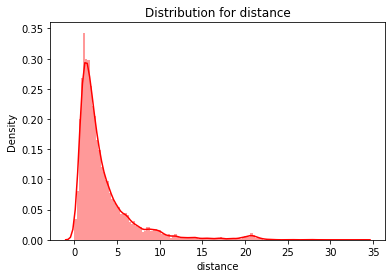

In [108]:
sns.distplot(test["distance"],bins='auto',color='red')
plt.title("Distribution for distance")
plt.ylabel("Density")
plt.show()

In [136]:
pred=test.copy()
pred_test=pred.drop(["year"],axis=1)
pred_test.head()

,passenger_count,Month,Date,Day,Hour,distance
0,1,1,27,1,13,2.323259
1,1,1,27,1,13,2.425353
2,1,10,8,5,11,0.618628
3,1,12,1,5,21,1.961033
4,1,12,1,5,21,5.387301


# Random Forest Regressor

In [145]:
RF_model=RandomForestRegressor(n_estimators=100).fit(train.iloc[:,1:6],train.iloc[:,0])
#predict value
pred_test['fare_amount']=RF_model.predict(test.iloc[:,0:5])
pred_test.head()

,passenger_count,Month,Date,Day,Hour,distance,fare_amount
0,1,1,27,1,13,2.323259,5.879
1,1,1,27,1,13,2.425353,5.879
2,1,10,8,5,11,0.618628,6.239
3,1,12,1,5,21,1.961033,5.370
4,1,12,1,5,21,5.387301,5.370
